<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0812_B_residual_and_inception_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 잔차 연결을 사용하여 모델 구성하기

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Add
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# 잔차 연결을 포함한 네트워크를 구현합니다.
def residual_block(inputs, num_channels, use_transform = False):
    x = Conv2D(num_channels, (3, 3), activation = 'relu', padding = 'same')(inputs)
    x = Conv2D(num_channels, (3, 3), padding = 'same')(x)
    
    # 입력값의 형태가 변환되는 경우,
    # 1x1 컨볼루션을 통해 크기를 조절해준다.
    if use_transform:
        x = MaxPooling2D(strides = 2)(x)
        inputs = Conv2D(num_channels, (1, 1), strides = 2, padding = 'same')(inputs)
    
    # 입력값과 변환된 입력값을 더해줍니다.
    add_x = Add()([inputs, x])
    
    return Activation('relu')(add_x)

# 쉬운 이해를 위해 MNIST와 동일한 형태로 사용하였습니다.
inputs = Input(shape = (28, 28, 1))
# use_transform은 MaxPooling을 통해,
# 입력값의 크기에 변환을 주겠다는 인자입니다.
x = residual_block(inputs, 32, use_transform=True)
x = residual_block(x, 32)
x = residual_block(x, 32, use_transform=True)

# 분류기 부분입니다. 
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 모델을 구성합니다.
model = Model(inputs = inputs, outputs = x)

In [2]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   9248        conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 32)   64          input_1[0][0]                    
_______________________________________________________________________________________

## 인셉션 모듈을 사용하여 모델 구성하기

In [3]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Concatenate
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def inception_module(x):
    x_1 = Conv2D(32, (1, 1), activation = 'relu')(x)
    
    x_2 = Conv2D(48, (1, 1), activation = 'relu')(x)
    x_2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x_2)
    
    x_3 = Conv2D(16, (1, 1), activation = 'relu')(x)
    x_3 = Conv2D(16, (5, 5), activation = 'relu', padding = 'same')(x_3)
    
    x_4 = MaxPooling2D(pool_size = (3, 3), strides = 1, padding = 'same')(x)
    x_4 = Conv2D(32, (1, 1), activation = 'relu')(x_4)
    
    output = Concatenate()([x_1, x_2, x_3, x_4])
    
    return output

inputs = Input(shape = (224, 224, 3))
x = inception_module(inputs)

model = Model(inputs = inputs, outputs = x)

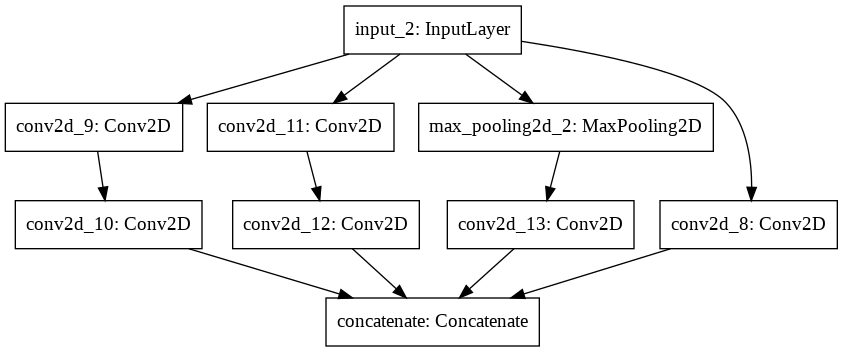

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model)